In [7]:
import pandas as pd # 필요 라이브러리 불러오기
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from collections import Counter

In [8]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # 한글 폰트 설정

news = pd.read_csv("./ai_news_keyword_2013.CSV", engine='python') # 데이터 불러오기
news = news['키워드'] # 키워드 추출
news = news.values.tolist()

In [14]:
tfidf = TfidfVectorizer(max_features=20, max_df=0.95, min_df=0) # tf-idf 기준으로 뉴스 별
doc_tfidf = tfidf.fit_transform(news) # 상위 100개 단어 추출
tfidf_dict = tfidf.get_feature_names()

In [16]:
keywords = []
for n in news:
    keywords = keywords + n.split(',')
    
keyword_counts = Counter(keywords) # 각 단어 별 개수 계산하기
keywords_top20 = keyword_counts.most_common(20) # 상위 20개 추출

In [5]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
data_array = doc_tfidf.toarray()
Z = tsne.fit_transform(data_array.T) # 단어 기준으로 t-SNE 적용

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.655441
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.977814
[t-SNE] Error after 4350 iterations: 0.541922


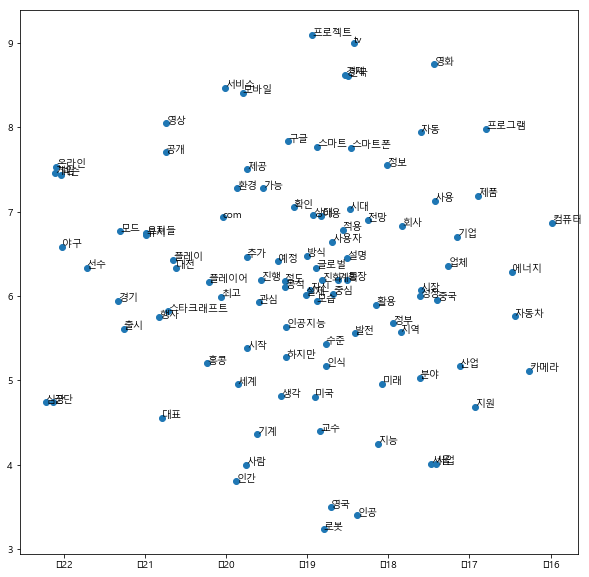

In [7]:
plt.rcParams["figure.figsize"] = (10,10) # size 크게 키움

# scatter plot 만듦
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i], xy=(Z[i,0], Z[i,1]))
plt.show()